In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [3]:
dta= pd.read_csv(r"C:\DATA SCIENCE STUDY DRIVE\iNeuron DataScience Course\CLASS PRACTISE RECORDED\DATE CLASS 51 Time Series Data Analysis\ML11 4\sunspots.csv")
dta.head(10)

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0
5,1705,58.0
6,1706,29.0
7,1707,20.0
8,1708,10.0
9,1709,8.0


# Preparing the Data

Next we need to do a little dataset preparation. Here, an annual date series must be date-times at the end of the year.

In [5]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008')) #Preparing date as index
del dta["YEAR"]

In [6]:
dta

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


## Examine data

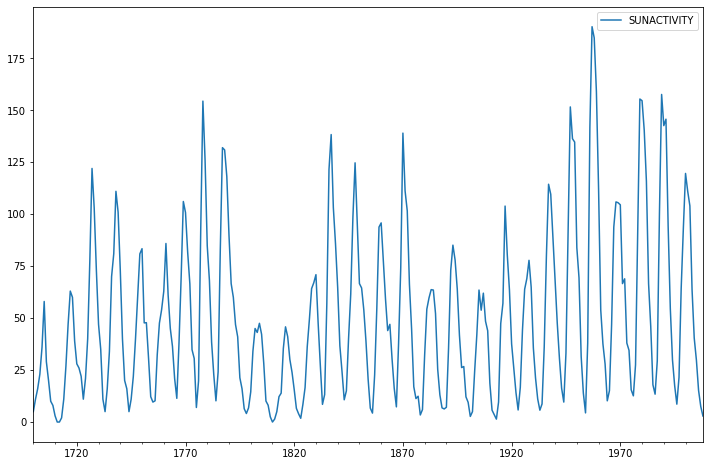

In [7]:
# show plots in the notebook
%matplotlib inline
dta.plot(figsize=(12,8));

In [8]:
sm.stats.durbin_watson(dta)

array([0.13952893])

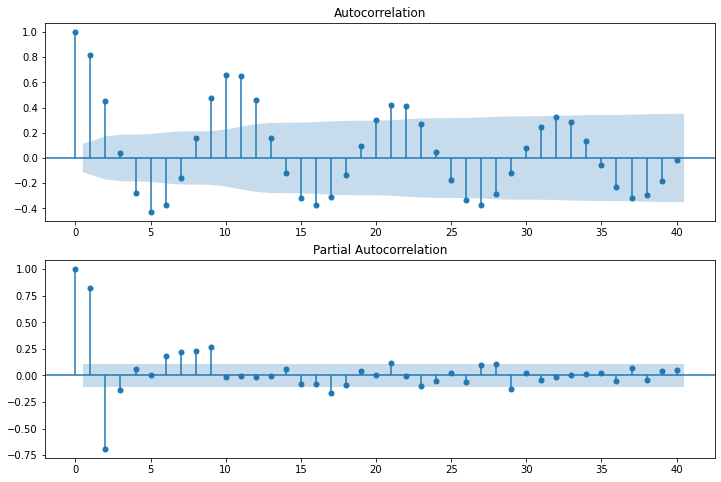

In [9]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1) #plot acf
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)   #plot pacf

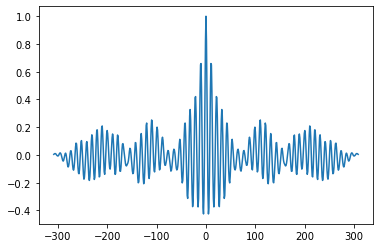

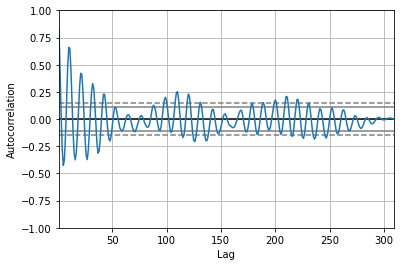

In [10]:
#manual ways to plot simmilar graphs shown in above one
from pandas.plotting import autocorrelation_plot
# show plots in the notebook
%matplotlib inline
dta['SUNACTIVITY_2'] = dta['SUNACTIVITY']
dta['SUNACTIVITY_2'] = (dta['SUNACTIVITY_2'] - dta['SUNACTIVITY_2'].mean()) / (dta['SUNACTIVITY_2'].std())
plt.acorr(dta['SUNACTIVITY_2'],maxlags = len(dta['SUNACTIVITY_2']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(dta['SUNACTIVITY'])
plt.show()

# Modeling the Data

In [12]:
arma_mod20 = sm.tsa.ARMA(dta['SUNACTIVITY'], (2,1)).fit()    #fitting model with usual p and q values
print(arma_mod20.params)

const                49.749219
ar.L1.SUNACTIVITY     1.470739
ar.L2.SUNACTIVITY    -0.755121
ma.L1.SUNACTIVITY    -0.153692
dtype: float64


C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


We now calculate the Akaike Information Criterion (AIC), Schwarz Bayesian Information Criterion (BIC), and Hannan-Quinn Information Criterion (HQIC). Our goalis to choose a model that minimizes (AIC, BIC, HQIC).

In [13]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2620.2771915568273 2638.943897941316 2627.7401763633848


Does our model obey the theory? We will use the Durbin-Watson test for autocorrelation. The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.

In [14]:
sm.stats.durbin_watson(arma_mod20.resid.values)

1.9903406322957233

 The Durbin-Watson test shows no autocorrelation.


## Plotting the Data

Next we plot and study the data it represents.

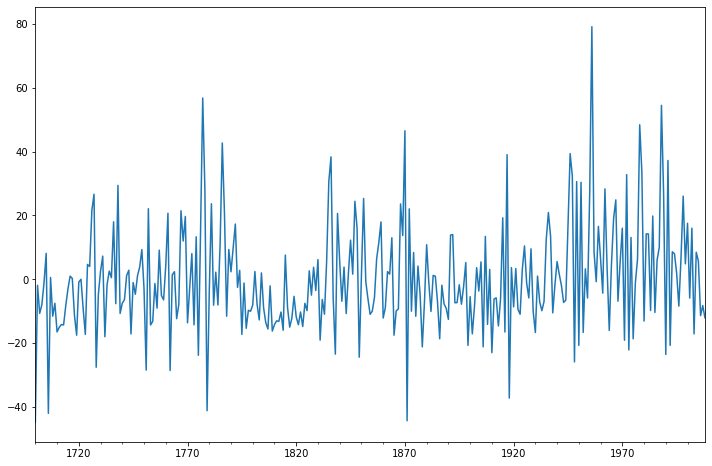

In [15]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);    # with model plotting residual plot 

## Analyzing the Residuals

In the following steps, we calculate the residuals, tests the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot.

In [16]:
resid20 = arma_mod20.resid   #calculating residuals 
stats.normaltest(resid20)   #applying normal test


NormaltestResult(statistic=48.55009921108007, pvalue=2.867344721546711e-11)

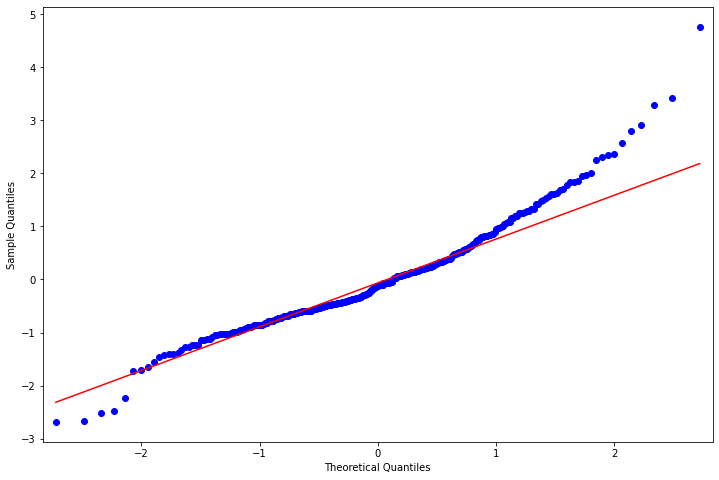

In [17]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)

## Model Autocorrelation


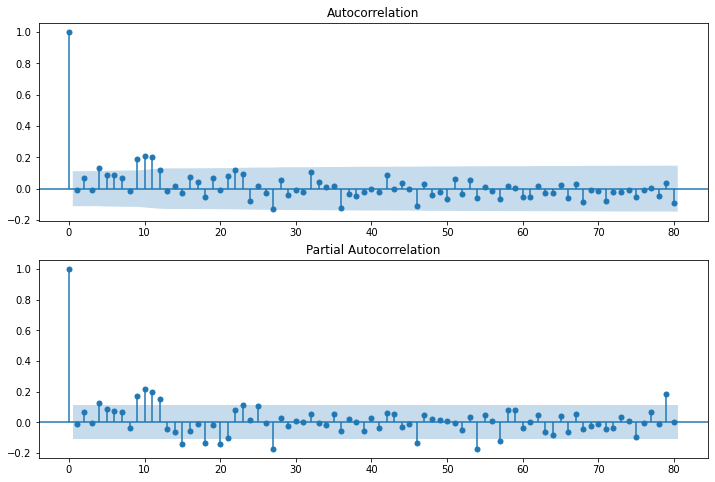

In [19]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values.squeeze(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=80, ax=ax2)

Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. The Ljung–Box Q test (named for Greta M. Ljung and George E. P. Box) is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process).

In [23]:
r,q,p = sm.tsa.acf(resid20.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0  -0.007721   0.018602  8.915134e-01
2.0   0.067883   1.461040  4.816586e-01
3.0  -0.007966   1.480967  6.866700e-01
4.0   0.131281   6.911272  1.406520e-01
5.0   0.084485   9.167592  1.025633e-01
6.0   0.086887  11.561938  7.248603e-02
7.0   0.070621  13.148928  6.856186e-02
8.0  -0.013210  13.204639  1.049999e-01
9.0   0.190582  24.839493  3.153957e-03
10.0  0.210382  39.064863  2.473305e-05
11.0  0.200231  51.993924  2.733349e-07
12.0  0.119030  56.578219  9.417755e-08
13.0 -0.013977  56.641646  2.076914e-07
14.0  0.017752  56.744300  4.331674e-07
15.0 -0.029076  57.020634  8.140733e-07
16.0  0.076468  58.938470  7.892399e-07
17.0  0.039418  59.449838  1.294888e-06
18.0 -0.052852  60.372316  1.781123e-06
19.0  0.066096  61.819980  1.987456e-06
20.0 -0.010267  61.855033  3.663034e-06
21.0  0.077882  63.879010  3.248410e-06
22.0  0.121014  68.782562  1.026710e-06
23.0  0.095280  71.832950  6.317699e-07


C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Notice that the p-values for the Ljung–Box Q test all are well above .05 for lags 1 through 8, indicating “significance.” This is not a desirable result. However, the p-values for the remaining lags through 40 data values as less than .05. So there is much data not contributing to correlations at high lags.


## Predictions

Next, we compute the predictions and analyze their fit against actual values.

In [28]:
predict_sunspots20 = arma_mod20.predict('1950', '2012')  #predict for time period of given values
print(predict_sunspots20)

1950-12-31    104.632683
1951-12-31     39.014401
1952-12-31     48.192389
1953-12-31     10.636149
1954-12-31     10.303132
                 ...    
2008-12-31     14.968911
2009-12-31     14.604434
2010-12-31     33.437263
2011-12-31     52.297166
2012-12-31     65.814087
Freq: A-DEC, Length: 63, dtype: float64


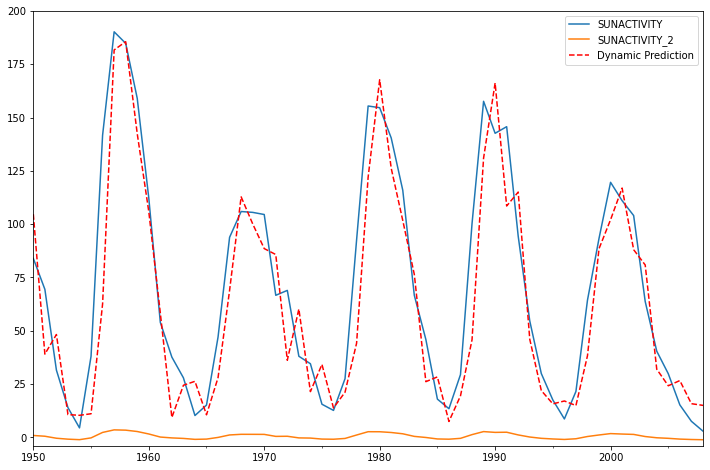

In [29]:
ax = dta.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

The fit looks good up to about 1998 and underfit the data afterwards.

## Calculate Forecast Errors

#### Mean absolute error:
The mean absolute error (MAE) value is computed as the average absolute error value. If this value is 0 (zero), the fit (forecast) is perfect. As compared to the mean squared error value, this measure of fit will “de-emphasize” outliers, that is, unique or rare large error values will affect the MAE less than the MSE value.

#### Mean Forecast Error (Bias).
The mean forecast error (MFE) is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations, and a large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal.

The MAE is a better indicator of fit than the MFE.

In [31]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [32]:
print("MFE = ", mean_forecast_err(dta.SUNACTIVITY, predict_sunspots20))
print("MAE = ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots20))

MFE =  7.110619982652182
MAE =  0.23736128268884332


For MFE > 0, models tends to under-forecast. However, as long as the tracking signal is between –4 and 4, we assume the model is working correctly. The measure of MAE being small would indicate a pretty good fit.